<a href="https://colab.research.google.com/github/varqse/BBN_Data_Analytics/blob/main/BBN_Big_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
folder_path = '/content/drive/My Drive/CSVfiles'
os.makedirs(folder_path, exist_ok=True)

In [ ]:
os.listdir('/content/drive/My Drive/CSVfiles')

['train.csv']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/My Drive/CSVfiles/Big Data.xlsx'
df = pd.read_excel(file_path, sheet_name='Lembar1')

df.head()

,Tanggal,Jam,Nama Kasir,Jenis Produk,Nama Produk,Harga Per Produk,Jumlah,SubTotal,Tipe Harga,Total
0,2024-02-09 00:00:00,18:00:20,Dian paramita,Bakso,Nyonya,13000,1,13000,Normal,13000
1,2024-02-09 00:00:00,18:00:20,Dian paramita,Minuman,Choco ice,10000,2,20000,Normal,20000
2,2024-02-09 00:00:00,18:00:20,Dian paramita,Minuman,Strawberry ice,10000,1,10000,Normal,10000
3,2024-02-09 00:00:00,18:00:20,Dian paramita,Snack,Kentang Goreng,12000,2,24000,Normal,24000
4,2024-02-09 00:00:00,18:39:22,Dian paramita,Bakso,Nyonya,13000,1,13000,Normal,13000


In [ ]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], dayfirst=True)
df['Tanggal'] = df['Tanggal'].dt.strftime('%m/%d/%Y')

print(df['Tanggal'].head())

0    02/09/2024
1    02/09/2024
2    02/09/2024
3    02/09/2024
4    02/09/2024
Name: Tanggal, dtype: object


In [ ]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], dayfirst=True, errors='coerce')

print(df['Tanggal'].head())

df['Jam'] = pd.to_datetime(df['Jam'], format='%H:%M:%S').dt.time

0   2024-09-02
1   2024-09-02
2   2024-09-02
3   2024-09-02
4   2024-09-02
Name: Tanggal, dtype: datetime64[ns]


In [ ]:
df.head()

,Tanggal,Jam,Nama Kasir,Jenis Produk,Nama Produk,Harga Per Produk,Jumlah,SubTotal,Tipe Harga,Total
0,2024-09-02,18:00:20,Dian paramita,Bakso,Nyonya,13000,1,13000,Normal,13000
1,2024-09-02,18:00:20,Dian paramita,Minuman,Choco ice,10000,2,20000,Normal,20000
2,2024-09-02,18:00:20,Dian paramita,Minuman,Strawberry ice,10000,1,10000,Normal,10000
3,2024-09-02,18:00:20,Dian paramita,Snack,Kentang Goreng,12000,2,24000,Normal,24000
4,2024-09-02,18:39:22,Dian paramita,Bakso,Nyonya,13000,1,13000,Normal,13000


In [ ]:
# Produk terlaris
top_products = df.groupby('Nama Produk')['Jumlah'].sum().sort_values(ascending=False).head(10)

# Convert to DataFrame for better display
top_products_df = pd.DataFrame(top_products).reset_index()
top_products_df.columns = ['Nama Produk', 'Jumlah Terjual']  # Rename columns

# Display the table using display() for a formatted output in Colab
display(top_products_df)

,Nama Produk,Jumlah Terjual
0,Es Teh,131
1,Pentol,111
2,Kentang Goreng,78
3,Nyonya,49
4,Reguler,40
5,Teh,37
6,Kopi Hitam,36
7,Cappuccino ice,27
8,Money bag goreng,26
9,Mie Goreng,24


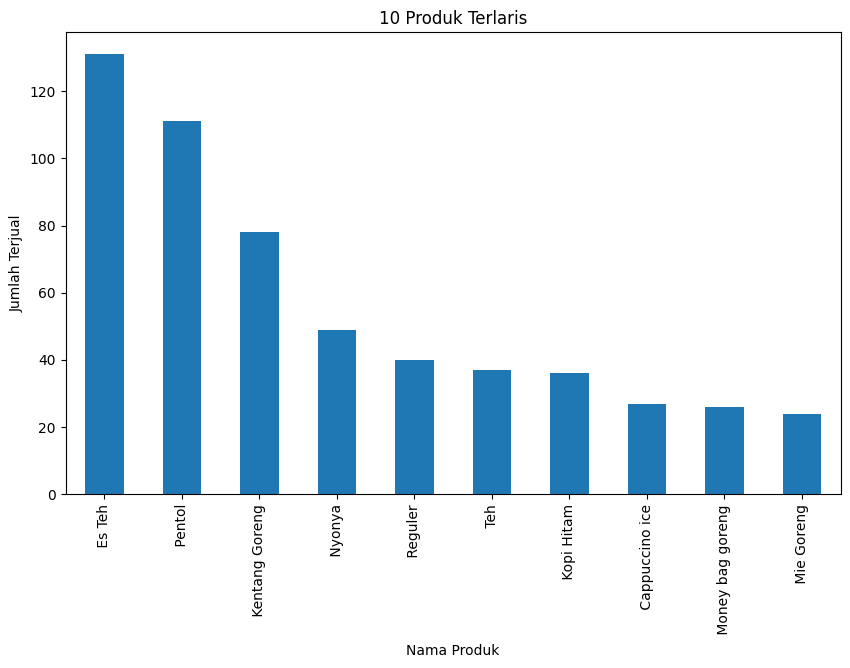

In [ ]:
top_products.head(10).plot(kind='bar', figsize=(10, 6), title='10 Produk Terlaris')
plt.ylabel('Jumlah Terjual')
plt.show()

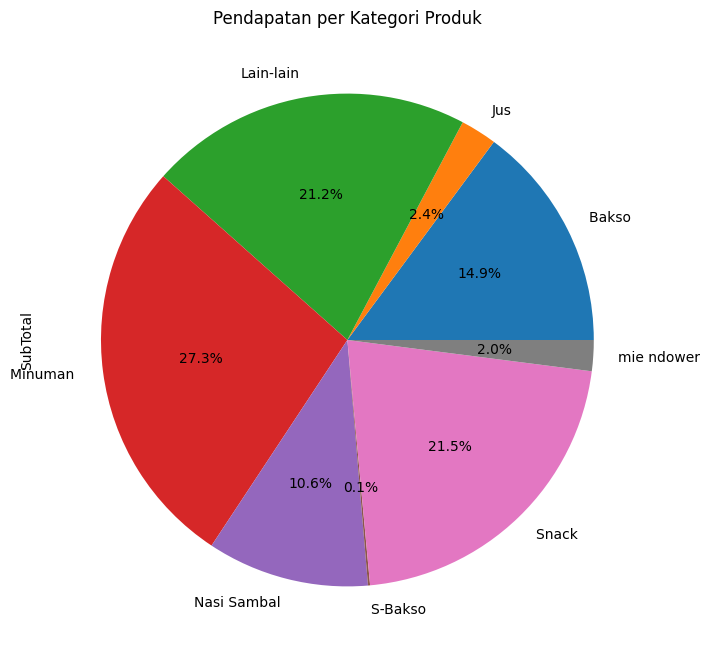

In [ ]:
category_sales = df.groupby('Jenis Produk')['SubTotal'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Pendapatan per Kategori Produk')
plt.show()

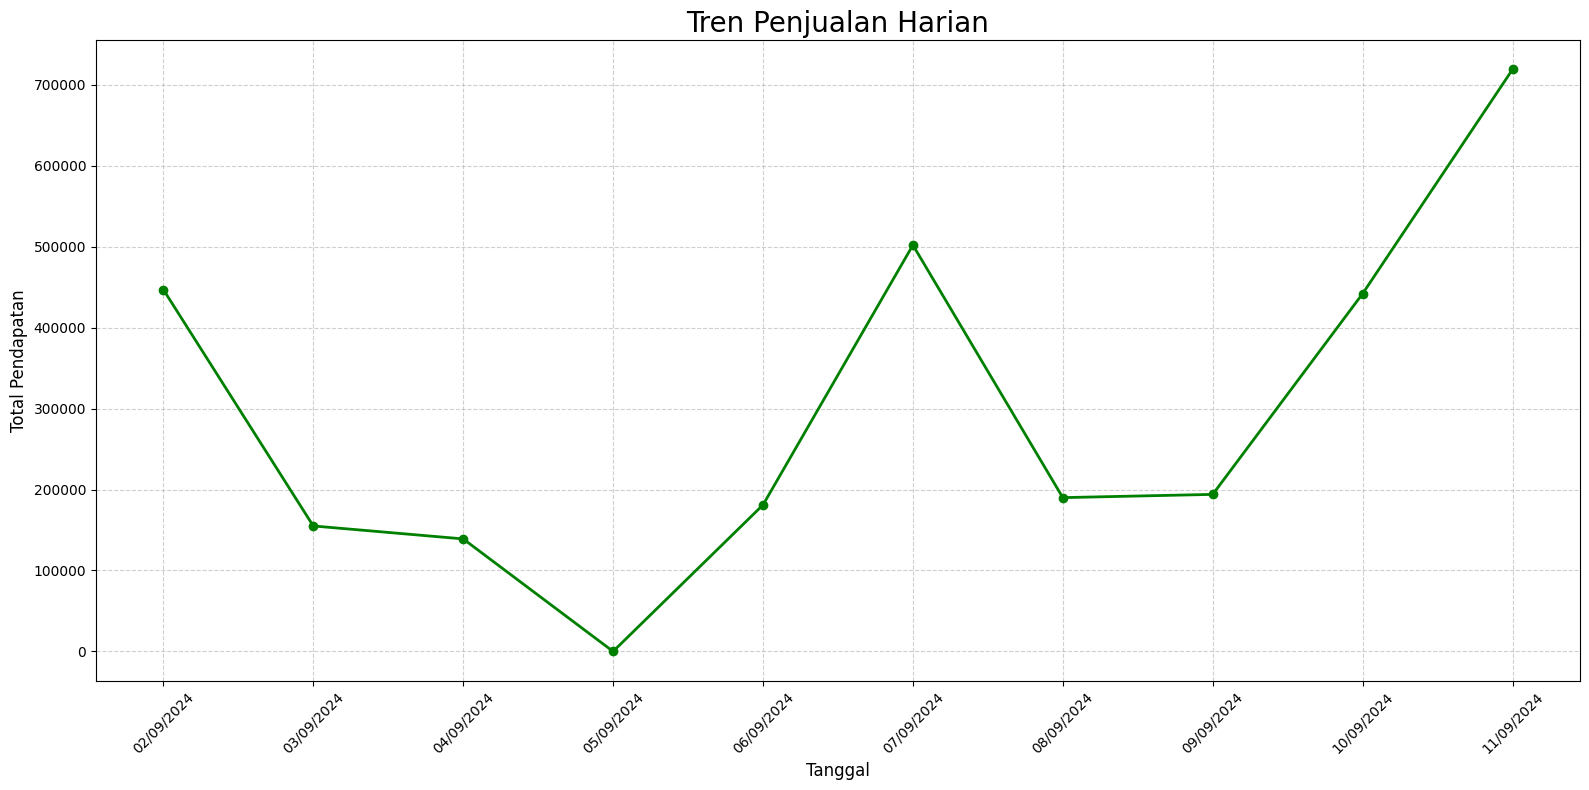

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

daily_sales = df.groupby(df['Tanggal'].dt.date)['Total'].sum()

date_range = pd.date_range(start=daily_sales.index.min(), end=daily_sales.index.max())

daily_sales_full = daily_sales.reindex(date_range, fill_value=0)

plt.figure(figsize=(16, 8))
plt.plot(daily_sales_full.index, daily_sales_full.values, color='green', marker='o', linestyle='-', linewidth=2)
plt.title('Tren Penjualan Harian', fontsize=20)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Total Pendapatan', fontsize=12)

plt.xticks(ticks=daily_sales_full.index, labels=daily_sales_full.index.strftime('%d/%m/%Y'), rotation=45)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-82-dacb92faa0f6>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Jam_Rentang'] = df['Jam'].dt.floor('H') + pd.Timedelta(minutes=1)


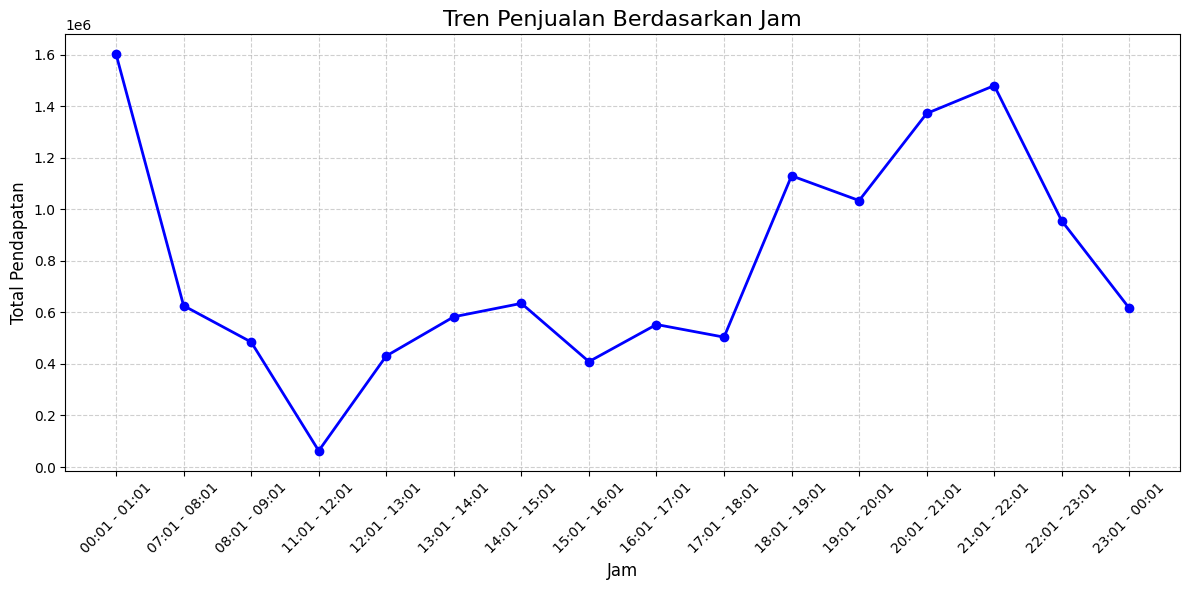

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Mengonversi kolom 'Jam' menjadi tipe datetime
df['Jam'] = pd.to_datetime(df['Jam'], format='%H:%M:%S')

# Membuat rentang waktu per jam
df['Jam_Rentang'] = df['Jam'].dt.floor('H') + pd.Timedelta(minutes=1)

# Mengelompokkan penjualan berdasarkan rentang waktu
hourly_sales = df.groupby(['Jam_Rentang'])['Total'].sum().reset_index()

# Membuat label untuk sumbu x
hourly_sales['Jam_Label'] = hourly_sales['Jam_Rentang'].dt.strftime('%H:%M') + ' - ' + (hourly_sales['Jam_Rentang'] + pd.Timedelta(hours=1)).dt.strftime('%H:%M')

# Membuat grafik
plt.figure(figsize=(12, 6))
plt.plot(hourly_sales['Jam_Label'], hourly_sales['Total'], color='blue', marker='o', linestyle='-', linewidth=2)
plt.title('Tren Penjualan Berdasarkan Jam', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Total Pendapatan', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


MSE (Regresi Linear dengan Jam): 305673506.2950991


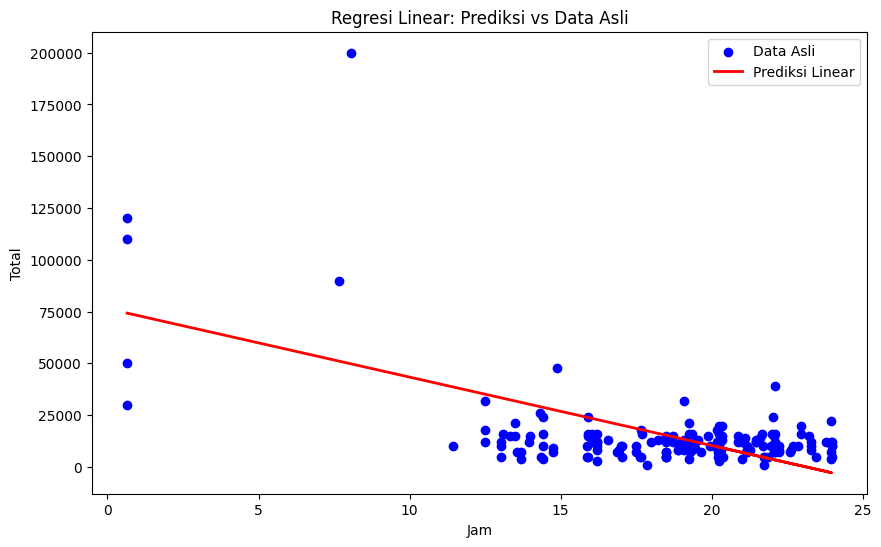

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df['Jam'] = pd.to_datetime(df['Jam'], format='%H:%M:%S').dt.hour + pd.to_datetime(df['Jam'], format='%H:%M:%S').dt.minute / 60

X = df[['Jam']]
y = df['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

y_pred = model_linear.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred)
print(f'MSE (Regresi Linear dengan Jam): {mse_linear}')

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Data Asli')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediksi Linear')
plt.title('Regresi Linear: Prediksi vs Data Asli')
plt.xlabel('Jam')
plt.ylabel('Total')
plt.legend()
plt.show()

MSE (Regresi Polinomial dengan Jam): 1014455420.4713415


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


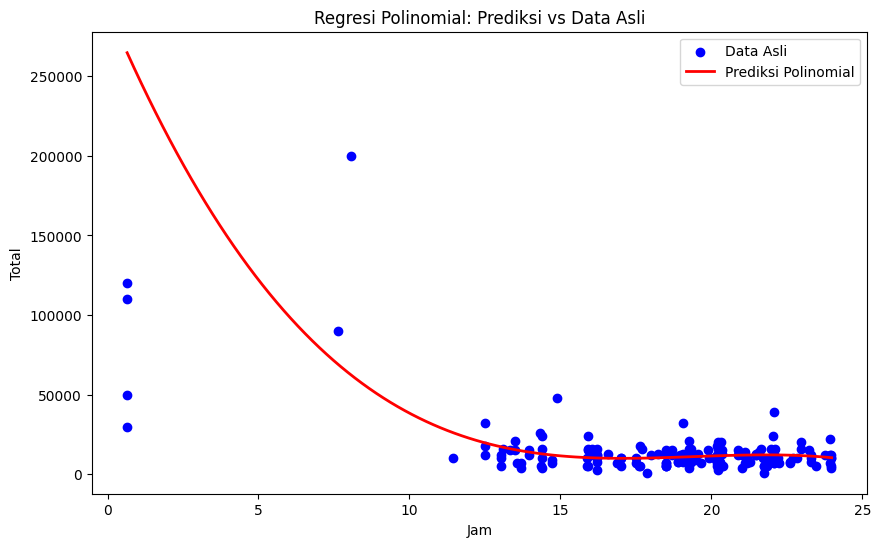

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

df['Jam'] = pd.to_datetime(df['Jam'], format='%H:%M:%S').dt.hour + pd.to_datetime(df['Jam'], format='%H:%M:%S').dt.minute / 60

X = df[['Jam']]
y = df['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)

y_pred_poly = model_poly.predict(X_poly_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'MSE (Regresi Polinomial dengan Jam): {mse_poly}')

plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, color='blue', label='Data Asli')

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model_poly.predict(X_range_poly)

plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Prediksi Polinomial')

plt.title('Regresi Polinomial: Prediksi vs Data Asli')
plt.xlabel('Jam')
plt.ylabel('Total')
plt.legend()

plt.show()

